# Dicision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.duplicated().sum()
df = df.drop_duplicates(keep=False)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

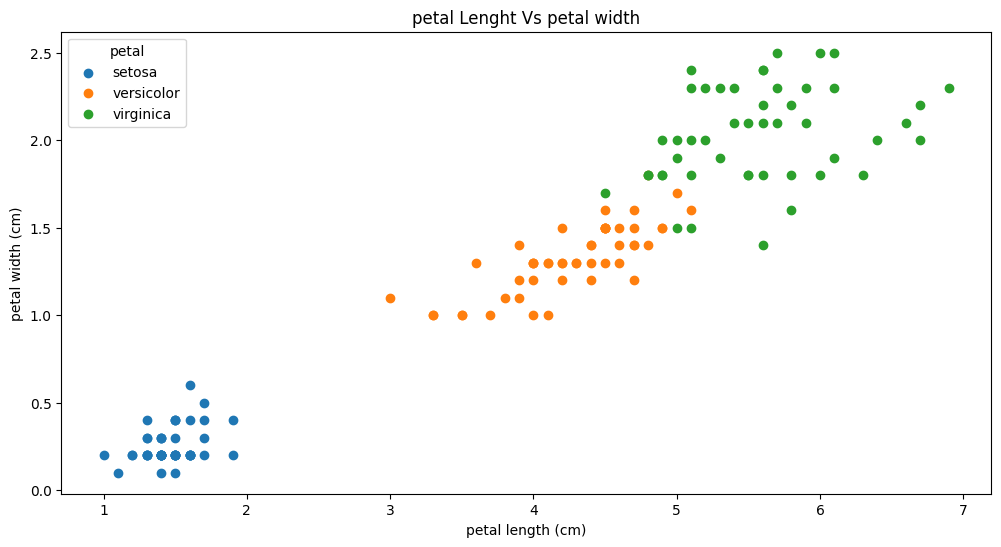

In [7]:
plt.figure(figsize=(12,6))
for petal, petal_data in df.groupby('species'):
    plt.scatter(petal_data['petal_length'],petal_data['petal_width'],label=petal)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(title="petal")
plt.title('petal Lenght Vs petal width')
plt.show()

In [8]:
X = df.drop("species", axis=1)
y = df["species"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = DecisionTreeClassifier(max_depth=3,criterion="entropy")

In [11]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris_decision_tree.png')

True

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
rf_clf = RandomForestClassifier(n_estimators=1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=42)

In [16]:
rf_y_pred = rf_clf.predict(X_test)
rf_y_pred

array(['virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica'], dtype=object)

In [17]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [18]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
gb_y_pred = gb_clf.predict(X_test)

In [20]:
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [1]:
result_list = []
total_sum = 0

while total_sum < 100:
    user_input = input()
    if total_sum == 100:
        break 
    try:
        value = int(user_input)
        if total_sum + value <= 100: 
            result_list.append(value)
            total_sum += value
        else:
            print(f"Cannot add {value}")
    except ValueError:
        print("Please enter a valid integer or type 'stop' to finish.")
    print(user_input)
    print(result_list)
print("Filtered list:", result_list)
print("Sum of the filtered list:", total_sum)


Please enter a valid integer or type 'stop' to finish.

[]
1
[1]
2
[1, 2]
3
[1, 2, 3]
4
[1, 2, 3, 4]
5
[1, 2, 3, 4, 5]
6
[1, 2, 3, 4, 5, 6]
10
[1, 2, 3, 4, 5, 6, 10]
20
[1, 2, 3, 4, 5, 6, 10, 20]
30
[1, 2, 3, 4, 5, 6, 10, 20, 30]
Cannot add 40
40
[1, 2, 3, 4, 5, 6, 10, 20, 30]
Cannot add 50
50
[1, 2, 3, 4, 5, 6, 10, 20, 30]


In [1]:
result_list = []
total_sum = 0

while total_sum < 100:
    user_input = input()
    if total_sum == 100:
        break 
    try:
        value = int(user_input)
        result_list.append(value)
        total_sum += value
    except ValueError:
        print("Please enter a valid integer or type 'stop' to finish.")
    print(user_input)
    print(result_list)
print("Filtered list:", result_list)
print("Sum of the filtered list:", total_sum)


3
[3]
4
[3, 4]
5
[3, 4, 5]
6
[3, 4, 5, 6]
7
[3, 4, 5, 6, 7]
7
[3, 4, 5, 6, 7, 7]
10
[3, 4, 5, 6, 7, 7, 10]
20
[3, 4, 5, 6, 7, 7, 10, 20]
30
[3, 4, 5, 6, 7, 7, 10, 20, 30]
40
[3, 4, 5, 6, 7, 7, 10, 20, 30, 40]
Filtered list: [3, 4, 5, 6, 7, 7, 10, 20, 30, 40]
Sum of the filtered list: 132
